<a href="https://colab.research.google.com/github/mhdhfzz/data-analyst-dicoding/blob/main/notebook_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E Commerce Public
- **Nama:** Zaim Irfansyah Arbi
- **Email:** zaimirfansyah@gmail.com
- **ID Dicoding:** zaimirfansyah

## Menentukan Pertanyaan Bisnis



1.  Kategori produk manakah yang paling banyak terjual?
1.  Di kota mana saja  jumlah pesanan tertinggi berada?
1.  Dimana lokasi pelanggan terbanyak berada?

## Import Semua Packages/Library yang Digunakan

In [96]:
# Import Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
import seaborn as sns
from scipy import stats

## **1. Data Wrangling**

### 1.1 Gathering Data

In [141]:
# Define the directory path where the CSV files are stored
data_directory = './data'

# Load each CSV file into a DataFrame and assign them to respective variables
orders_df = pd.read_csv(data_directory + '/orders_dataset.csv')
items_df = pd.read_csv(data_directory + '/order_items_dataset.csv')
products_df = pd.read_csv(data_directory + '/products_dataset.csv')
payments_df = pd.read_csv(data_directory + '/order_payments_dataset.csv')
reviews_df = pd.read_csv(data_directory + '/order_reviews_dataset.csv')
customers_df = pd.read_csv(data_directory + '/customers_dataset.csv')
sellers_df = pd.read_csv(data_directory + '/sellers_dataset.csv')
geolocation_df = pd.read_csv(data_directory + '/geolocation_dataset.csv')
category_df = pd.read_csv(data_directory + '/product_category_name_translation.csv')

# Verify the data is loaded correctly
data = {
    'orders': orders_df,
    'items': items_df,
    'products': products_df,
    'payments': payments_df,
    'reviews': reviews_df,
    'customers': customers_df,
    'sellers': sellers_df,
    'geo': geolocation_df,
    'category': category_df
}

for name, df in data.items():
    print(f"{name}: {df.shape}")


orders: (99441, 8)
items: (112650, 7)
products: (32951, 9)
payments: (103886, 5)
reviews: (99224, 7)
customers: (99441, 5)
sellers: (3095, 4)
geo: (1000163, 5)
category: (71, 2)


In [11]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.62,sao paulo,SP
1,1046,-23.55,-46.66,sao paulo,SP
2,1046,-23.55,-46.66,sao paulo,SP
3,1041,-23.55,-46.62,sao paulo,SP
4,1035,-23.55,-46.66,sao paulo,SP


In [18]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [17]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [16]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 1.2 Assessing Data

1.2.1 checking tipe data

In [20]:
# Menampilkan informasi tentang setiap DataFrame dalam dictionary
for nama_df, df in data.items():
  print(f"\nInformasi DataFrame '{nama_df}':")
  print(df.info())


Informasi DataFrame 'orders':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Informasi DataFrame 'items':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               ---------

In [24]:
# Kolom-kolom dalam DataFrame 'orders' yang perlu dikonversi ke format datetime
order_datetime_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

# Konversi kolom-kolom yang disebutkan dalam DataFrame 'orders' ke format datetime
for column in order_datetime_columns:
    data['orders'][column] = pd.to_datetime(data['orders'][column], errors='coerce')

# Kolom-kolom dalam DataFrame 'items' yang perlu dikonversi ke format datetime
item_datetime_columns = ["shipping_limit_date"]

# Konversi kolom-kolom yang disebutkan dalam DataFrame 'items' ke format datetime
for column in item_datetime_columns:
    data['items'][column] = pd.to_datetime(data['items'][column], errors='coerce')

# Kolom-kolom dalam DataFrame 'reviews' yang perlu dikonversi ke format datetime
review_datetime_columns = [
    "review_creation_date",
    "review_answer_timestamp"
]

# Konversi kolom-kolom yang disebutkan dalam DataFrame 'reviews' ke format datetime
for column in review_datetime_columns:
    data['reviews'][column] = pd.to_datetime(data['reviews'][column], errors='coerce')


1.2.2 Cek duplikasi data

In [25]:
# Buat dictionary kosong untuk menyimpan jumlah duplikasi dan jumlah sampel total
duplikasi_per_data = {}
jumlah_sampel_total = {}

# Hitung dan simpan jumlah duplikasi dan jumlah sampel total untuk setiap DataFrame
for nama_df, df in data.items():
    duplikasi_per_data[nama_df] = df.duplicated().sum()
    jumlah_sampel_total[nama_df] = len(df)

# Ubah dictionary menjadi DataFrame
duplikasi_df = pd.DataFrame(list(duplikasi_per_data.items()), columns=['Nama DataFrame', 'Jumlah Duplikasi'])
sampel_total_df = pd.DataFrame(list(jumlah_sampel_total.items()), columns=['Nama DataFrame', 'Jumlah Sampel Total'])

# Gabungkan kedua DataFrame secara horizontal
hasil_gabungan_df = pd.merge(sampel_total_df, duplikasi_df, on='Nama DataFrame')

print(hasil_gabungan_df)


  Nama DataFrame  Jumlah Sampel Total  Jumlah Duplikasi
0         orders                99441                 0
1          items               112650                 0
2       products                32951                 0
3       payments               103886                 0
4        reviews                99224                 0
5      customers                99441                 0
6        sellers                 3095                 0
7            geo              1000163            914718
8       category                   71                 0


1.2.3 cek null value

In [28]:
# Buat dictionary kosong untuk menyimpan jumlah nilai null pada setiap DataFrame
jumlah_nilai_null = {}

# Hitung dan simpan jumlah nilai null untuk setiap DataFrame
for nama_df, df in data.items():
    # Hitung jumlah nilai null per kolom dalam DataFrame
    jumlah_nilai_null[nama_df] = df.isna().sum()
    # Tampilkan nama DataFrame dan jumlah nilai null per kolom
    print(f"DataFrame: {nama_df}\nJumlah Nilai Null:\n{jumlah_nilai_null[nama_df]}\n")

DataFrame: orders
Jumlah Nilai Null:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

DataFrame: items
Jumlah Nilai Null:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

DataFrame: products
Jumlah Nilai Null:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

DataFrame: payments
Jumlah Nilai Null:
order_id              

### **1.3 Data Cleaning**

1.3.1 Order



*   Ini adalah kumpulan data yang paling penting karena seperti tabel penghubung, dan terhubung ke banyak kumpulan data lainnya berdasarkan order_id.



In [29]:
# Tampilkan statistik jumlah pesanan berdasarkan status
status_pesanan = data['orders']['order_status'].value_counts()

# Hanya pilih pesanan yang sudah dikirim
print("Statistik Status Pesanan:")
print(status_pesanan)


Statistik Status Pesanan:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [30]:
# Hitung jumlah pesanan dengan status 'delivered'
jumlah_delivered = data['orders']['order_status'].value_counts().get('delivered', 0)

# Hitung total jumlah pesanan
total_pesanan = len(data['orders'])

# Hitung persentase pesanan yang sudah dikirim
persentase_delivered = (jumlah_delivered / total_pesanan) * 100

# Cetak hasil
print(f"Jika hanya mempertimbangkan pesanan yang telah dikirim, kita masih mendapatkan {persentase_delivered:.2f}% dari data.")

Jika hanya mempertimbangkan pesanan yang telah dikirim, kita masih mendapatkan 97.02% dari data.


In [31]:
# Pertama, ambil semua order_id di mana status pesanan bukan 'delivered'
tidak_terkirim_ids = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values

# Sekarang filter setiap DataFrame lainnya di mana order_id adalah foreign key
for nama_df, df in data.items():
    if 'order_id' in df.columns:
        # Hapus baris di mana order_id ada dalam daftar tidak_terkirim_ids
        df.drop(df[df['order_id'].isin(tidak_terkirim_ids)].index, inplace=True)


In [32]:
# Periksa nilai yang hilang di setiap DataFrame
for nama_df, df in data.items():
    for kolom in df.columns:
        # Periksa apakah ada nilai hilang di kolom
        jumlah_nilai_hilang = df[kolom].isna().sum()
        if jumlah_nilai_hilang > 0:
            # Hitung persentase nilai hilang
            persentase_nilai_hilang = (jumlah_nilai_hilang / len(df)) * 100
            # Cetak nama kolom dan persentase nilai hilang
            print(f"{kolom} (%): {persentase_nilai_hilang:.2f}")


order_approved_at (%): 0.01
order_delivered_carrier_date (%): 0.00
order_delivered_customer_date (%): 0.01
product_category_name (%): 1.85
product_name_lenght (%): 1.85
product_description_lenght (%): 1.85
product_photos_qty (%): 1.85
product_weight_g (%): 0.01
product_length_cm (%): 0.01
product_height_cm (%): 0.01
product_width_cm (%): 0.01
review_comment_title (%): 88.37
review_comment_message (%): 59.42


In [33]:
# Fokus pada nilai hilang dalam kolom order_delivered_customer_date
jumlah_nilai_hilang_delivered_date = data['orders']['order_delivered_customer_date'].isna().sum()

# Cetak jumlah pesanan yang tidak memiliki tanggal pengiriman
print(f"Terdapat {jumlah_nilai_hilang_delivered_date} pesanan yang tidak memiliki tanggal pengiriman.")

Terdapat 8 pesanan yang tidak memiliki tanggal pengiriman.


In [34]:
# Identifikasi order_id yang tidak memiliki tanggal pengiriman
order_ids_tanpa_tanggal_pengiriman = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isna()].values

# Hapus baris di DataFrame lain yang memiliki order_id tanpa tanggal pengiriman
for nama_df, df in data.items():
    if 'order_id' in df.columns:
        # Hapus baris di mana order_id ada dalam daftar order_ids_tanpa_tanggal_pengiriman
        df.drop(df[df['order_id'].isin(order_ids_tanpa_tanggal_pengiriman)].index, inplace=True)

In [35]:
# Menambahkan kolom baru untuk menandai apakah pesanan dikirim tepat waktu atau terlambat
data['orders']['status_pengiriman'] = np.where(
    data['orders']['order_delivered_customer_date'] <= data['orders']['order_estimated_delivery_date'],
    'Tepat Waktu',
    'Terlambat'
)

1.3.2 Reviews

In [36]:
# Tampilkan nama-nama kolom yang ada di DataFrame 'reviews'
print('Kolom ulasan: ', data['reviews'].columns.values)

# Kolom 'review_comment_title' memiliki 88% nilai NaN, sehingga akan dihapus
kolom_dihapus = ['review_comment_title']
data['reviews'].drop(columns=kolom_dihapus, inplace=True)

Kolom ulasan:  ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


In [37]:
# Ganti NaN dengan 0 dan teks ulasan dengan 1 di kolom 'review_comment_message'
data['reviews']['review_comment_message'] = np.where(
    data['reviews']['review_comment_message'].isna(),  # Cek nilai NaN
    0,  # Ganti NaN dengan 0
    1   # Ganti nilai teks dengan 1
)

1.3.3 Products

In [38]:
# Tampilkan nama-nama kolom yang ada di DataFrame 'products'
print('Kolom produk: ', data['products'].columns.values)

# Kolom berikut dihapus karena terlalu banyak nilai NaN atau dianggap tidak relevan
kolom_dihapus_produk = [
    'product_name_lenght',
    'product_description_lenght',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

# Hapus kolom-kolom yang tidak relevan dari DataFrame 'products'
data['products'].drop(columns=kolom_dihapus_produk, inplace=True)

Kolom produk:  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']


In [40]:
# Setelah melihat daftar kategori produk yang sangat panjang, 
# saya memutuskan untuk mengganti nilai NaN pada kolom ini dengan 'lainnya'
data['products']['product_category_name'] = data['products']['product_category_name'].fillna(value='lainnya')

In [42]:
# Mengganti nilai NaN dengan nol di kolom ini karena produk berpotensi memiliki nol foto
data['products']['product_photos_qty'] = data['products']['product_photos_qty'].fillna(value=0)

1.3.4 Geo

In [43]:
# Menghapus data duplikat dari DataFrame 'geo'
data['geo'] = data['geo'].drop_duplicates()


## **2. Exploratory Data Analysis (EDA)**

### 2.1 Explore customers

In [44]:
data['customers'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
82088,2a88d24a9b440d400002b6a32e35cb9b,b9cf7914451bd3e7241b94513c574793,2533,sao paulo,SP
41021,d721d37c2317b409cf35b0de1fd9438b,fddbda9c640a523fd4ec421b55f4d7eb,95305,ibiraiaras,RS
10638,1bb460027f7333d51cc602eb692f1b8d,a7f2edcd60f0eeb573b439042bcad226,7134,guarulhos,SP
77825,726f28d51b162c746e14553241df9de8,b7d12dd279b98c2d0f8b920052eb2862,13232,campo limpo paulista,SP
86241,501e72b0ab6bb25a06e35822a912a065,f4c9f17baaf056a2b3b34ca484270e24,14415,patrocinio paulista,SP


In [45]:
# Mengelompokkan data pelanggan berdasarkan kota
# Menghitung jumlah pelanggan unik di setiap kota
# Mengurutkan hasil dari kota dengan jumlah pelanggan unik terbanyak hingga paling sedikit
jumlah_pelanggan_per_kota = data['customers']\
    .groupby(by="customer_city")\
    .customer_id.nunique()\
    .sort_values(ascending=False)

print(jumlah_pelanggan_per_kota)


customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64


In [46]:
# Mengelompokkan data pelanggan berdasarkan negara bagian
# Menghitung jumlah pelanggan unik di setiap negara bagian
# Mengurutkan hasil dari negara bagian dengan jumlah pelanggan unik terbanyak hingga paling sedikit
jumlah_pelanggan_per_negara_bagian = data['customers']\
    .groupby(by="customer_state")\
    .customer_id.nunique()\
    .sort_values(ascending=False)

print(jumlah_pelanggan_per_negara_bagian)


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64


### 2.2 Explore payments

In [47]:
data['payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
69311,f148f0d15c9e216159aadb7bffdb0fe7,1,credit_card,4,219.21
82106,7954fe1680493c893c4ec14df43ebb73,1,credit_card,6,173.18
35464,87dbf189fd5e4ff0a6846675d7fe9d0e,1,credit_card,1,119.45
4520,b3ac86bf741341789a0603dc5f8b0ecd,1,credit_card,15,404.72
43397,06215d34c1ec4e1106eb12ae5fd0370f,1,credit_card,1,88.20


In [48]:
# Mengelompokkan data pembayaran berdasarkan jenis pembayaran
# Menghitung jumlah pesanan unik untuk setiap jenis pembayaran
# Mengurutkan hasil dari jenis pembayaran dengan jumlah pesanan unik terbanyak hingga paling sedikit
jumlah_pesanan_per_jenis_pembayaran = data['payments']\
    .groupby(by="payment_type")\
    .order_id.nunique()\
    .sort_values(ascending=False)

print(jumlah_pesanan_per_jenis_pembayaran)


payment_type
credit_card    74297
boleto         19191
voucher         3679
debit_card      1484
Name: order_id, dtype: int64


### 2.3 Explore orders

In [49]:
data['orders'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,status_pengiriman
92724,865aee0fd5873d8a2974df861e2526ef,622c8e6dd2f3d6f07a232257ee86e6b9,delivered,2018-01-07 20:49:50,2018-01-07 21:31:45,2018-01-24 18:15:05,2018-02-24 13:42:53,2018-04-17,Tepat Waktu
75143,0b84583d6c4780ec023cc037e77410d2,a1306c28063b41c54726e91e24ffcb3a,delivered,2018-01-08 15:45:44,2018-01-09 07:20:59,2018-01-10 20:23:14,2018-01-12 21:58:47,2018-01-24,Tepat Waktu
34942,5377d92bf883c16eea93ee9625f3190c,1bf7076a50821623df388f22ead99764,delivered,2017-12-15 14:17:23,2017-12-15 14:33:19,2017-12-22 20:52:23,2017-12-27 19:49:13,2018-01-10,Tepat Waktu
24066,61816022ac3061c27c63a5432085340b,ddf6cc2c282686bd3b7043d01c06f006,delivered,2018-04-12 20:36:17,2018-04-14 02:30:34,2018-04-16 23:38:53,2018-04-17 23:38:28,2018-04-30,Tepat Waktu
96577,dacf07b003ccc1ffbf3d890a402329f8,7cda83c1b0ab225fe4afb8d9d28c7fb5,delivered,2017-02-12 16:03:25,2017-02-12 16:15:21,2017-02-24 10:38:59,2017-03-02 12:05:57,2017-03-21,Tepat Waktu


### 2.4 Explore customers_df & orders_df

*   Merge customers & orders

In [52]:
# Menggabungkan DataFrame 'customers' dan 'orders' berdasarkan kolom 'customer_id'
# Menggunakan metode left join untuk memastikan semua data dari 'customers' tetap ada
customers_orders_df = pd.merge(
    left=data['customers'],   # DataFrame sebelah kiri adalah 'customers'
    right=data['orders'],     # DataFrame sebelah kanan adalah 'orders'
    how="left",               # Menggunakan left join
    left_on="customer_id",    # Kolom penggabung dari DataFrame sebelah kiri
    right_on="customer_id"    # Kolom penggabung dari DataFrame sebelah kanan
)

customers_orders_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,status_pengiriman
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,Tepat Waktu
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,Tepat Waktu
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Terlambat
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,Tepat Waktu
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,Tepat Waktu


*   Merge payments & reviews

In [55]:
# Menggabungkan DataFrame 'payments' dan 'reviews' berdasarkan kolom 'order_id'
# Menggunakan metode left join untuk memastikan semua data dari 'payments' tetap ada
payments_reviews_df = pd.merge(
    left=data['payments'],   # DataFrame sebelah kiri adalah 'payments'
    right=data['reviews'],   # DataFrame sebelah kanan adalah 'reviews'
    how="left",              # Menggunakan left join
    left_on="order_id",      # Kolom penggabung dari DataFrame sebelah kiri
    right_on="order_id"      # Kolom penggabung dari DataFrame sebelah kanan
)

payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39


In [56]:
# Mengurutkan DataFrame 'payments_reviews_df' berdasarkan kolom 'payment_value' dalam urutan menurun
payments_reviews_df_sorted = payments_reviews_df.sort_values(by="payment_value", ascending=False)

# Menampilkan lima baris pertama dari DataFrame yang sudah diurutkan
payments_reviews_df_sorted.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06,2017-06-07 19:35:23


In [57]:
# Mengelompokkan DataFrame 'payments_reviews_df' berdasarkan kolom 'payment_type'
# Menerapkan fungsi agregasi untuk menghitung beberapa statistik untuk setiap kelompok
payment_agg_df = payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",        # Menghitung jumlah order_id unik untuk setiap jenis pembayaran
    "payment_value": ["min", "max"]  # Menghitung nilai minimum dan maksimum dari payment_value untuk setiap jenis pembayaran
}).reset_index()

# Menampilkan hasil agregasi
print(payment_agg_df)

  payment_type order_id payment_value          
                nunique           min       max
0       boleto    19191         11.62   7274.88
1  credit_card    74297          0.01  13664.08
2   debit_card     1484         13.38   4445.50
3      voucher     3679          0.00   1839.05


*   Merge customers_orders & payments_reviews

In [59]:
# Menggabungkan DataFrame 'customers_orders_df' dan 'payments_reviews_df' berdasarkan kolom 'order_id'
# Tujuan penggabungan ini adalah untuk mengintegrasikan data pesanan dengan data pembayaran dan ulasan,
# sehingga memungkinkan analisis yang lebih menyeluruh dan lengkap mengenai pelanggan dan perilaku mereka.

customers_df = pd.merge(
    left=customers_orders_df,   # DataFrame sebelah kiri adalah 'customers_orders_df' yang berisi data pelanggan dan pesanan mereka
    right=payments_reviews_df,  # DataFrame sebelah kanan adalah 'payments_reviews_df' yang berisi data pembayaran dan ulasan
    how="left",                 # Menggunakan left join untuk memastikan semua data dari 'customers_orders_df' tetap ada
    left_on="order_id",         # Kolom penggabung dari DataFrame sebelah kiri adalah 'order_id'
    right_on="order_id"         # Kolom penggabung dari DataFrame sebelah kanan adalah 'order_id'
)

# Menampilkan lima baris pertama dari DataFrame hasil penggabungan untuk memastikan penggabungan berjalan dengan benar
customers_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,status_pengiriman,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,Tepat Waktu,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,Tepat Waktu,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Terlambat,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,Tepat Waktu,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,Tepat Waktu,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


### 2.5 Explore items & sellers

*   Merge items & sellers

In [60]:
# Menggabungkan DataFrame 'items' dan 'sellers' berdasarkan kolom 'seller_id'
# Tujuan penggabungan ini adalah untuk mengintegrasikan informasi produk dengan informasi penjual.

item_seller_df = pd.merge(
    left=data['items'],   # DataFrame sebelah kiri adalah 'items' yang berisi data tentang item
    right=data['sellers'],  # DataFrame sebelah kanan adalah 'sellers' yang berisi data tentang penjual
    how="left",                 # Menggunakan left join untuk memastikan semua data dari 'items' tetap ada
    left_on="seller_id",         # Kolom penggabung dari DataFrame sebelah kiri adalah 'seller_id'
    right_on="seller_id"         # Kolom penggabung dari DataFrame sebelah kanan adalah 'seller_id'
)

# Menampilkan lima baris pertama dari DataFrame hasil penggabungan untuk memastikan penggabungan berjalan dengan benar
item_seller_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [62]:
# Mengelompokkan data berdasarkan 'seller_city' dan menghitung jumlah unik dari 'seller_id' di setiap kota.
# Kemudian, hasilnya diurutkan secara menurun untuk menampilkan kota dengan jumlah penjual unik terbanyak.
# Terakhir, menampilkan 10 kota teratas dengan jumlah penjual unik terbanyak.

top_seller_cities = (item_seller_df.groupby(by="seller_city")  # Mengelompokkan data berdasarkan kolom 'seller_city'
                    .seller_id.nunique()                       # Menghitung jumlah unik dari 'seller_id' dalam setiap kota
                    .sort_values(ascending=False)              # Mengurutkan hasil dalam urutan menurun
                    .head(10))                                  # Menampilkan 10 hasil teratas

# Menampilkan hasil
print(top_seller_cities)

seller_city
sao paulo         661
curitiba          124
rio de janeiro     92
belo horizonte     65
ribeirao preto     50
ibitinga           49
guarulhos          48
santo andre        44
campinas           40
maringa            40
Name: seller_id, dtype: int64


In [63]:
# Mengelompokkan data berdasarkan 'seller_state' dan menghitung jumlah unik dari 'seller_id' di setiap negara bagian.
# Kemudian, hasilnya diurutkan secara menurun untuk menampilkan negara bagian dengan jumlah penjual unik terbanyak.
# Terakhir, menampilkan 10 negara bagian teratas dengan jumlah penjual unik terbanyak.

top_seller_states = (item_seller_df.groupby(by="seller_state")  # Mengelompokkan data berdasarkan kolom 'seller_state'
                    .seller_id.nunique()                        # Menghitung jumlah unik dari 'seller_id' dalam setiap negara bagian
                    .sort_values(ascending=False)               # Mengurutkan hasil dalam urutan menurun
                    .head(10))                                  # Menampilkan 10 hasil teratas

# Menampilkan hasil
print(top_seller_states)


seller_state
SP    1769
PR     335
MG     236
SC     184
RJ     163
RS     125
GO      39
DF      30
ES      22
BA      18
Name: seller_id, dtype: int64


### 2.6 Explore products & category

*   Merge products & category

In [64]:
# Menggabungkan DataFrame 'products' dengan 'category' berdasarkan kolom 'product_category_name'.
# Gabungan ini menggunakan left join, sehingga semua data dari 'products' akan dipertahankan
# dan data yang sesuai dari 'category' akan ditambahkan jika tersedia.

product_df = pd.merge(
    left=data['products'],                   # DataFrame produk
    right=data['category'],                  # DataFrame kategori produk
    how="left",                              # Menggunakan left join
    left_on="product_category_name",         # Kolom untuk menggabungkan dari DataFrame 'products'
    right_on="product_category_name"         # Kolom untuk menggabungkan dari DataFrame 'category'
)

# Menampilkan 5 baris pertama dari DataFrame hasil gabungan
product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [65]:
# Mengelompokkan data berdasarkan 'product_category_name' dan menghitung jumlah unik dari 'product_id' di setiap kategori produk.
# Kemudian, hasilnya diurutkan secara menurun untuk menampilkan kategori produk dengan jumlah produk unik terbanyak.
# Terakhir, menampilkan 10 kategori produk teratas dengan jumlah produk unik terbanyak.

top_product_categories = (product_df.groupby(by="product_category_name")  # Mengelompokkan data berdasarkan kolom 'product_category_name'
                         .product_id.nunique()                           # Menghitung jumlah unik dari 'product_id' dalam setiap kategori produk
                         .sort_values(ascending=False)                  # Mengurutkan hasil dalam urutan menurun
                         .head(10))                                     # Menampilkan 10 hasil teratas

# Menampilkan hasil
print(top_product_categories)


product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64


In [66]:
# Mengelompokkan data berdasarkan 'product_category_name_english' dan menghitung jumlah unik dari 'product_id' dalam setiap kategori produk.
# Kemudian, hasilnya diurutkan dalam urutan menurun untuk menampilkan kategori produk dengan jumlah produk unik terbanyak.
# Terakhir, menampilkan 10 kategori produk teratas dengan jumlah produk unik terbanyak.

top_product_categories_english = (product_df.groupby(by="product_category_name_english")  # Mengelompokkan data berdasarkan kolom 'product_category_name_english'
                                  .product_id.nunique()                           # Menghitung jumlah unik dari 'product_id' dalam setiap kategori produk
                                  .sort_values(ascending=False)                  # Mengurutkan hasil dalam urutan menurun
                                  .head(10))                                     # Menampilkan 10 hasil teratas

# Menampilkan hasil
print(top_product_categories_english)


product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64


Merge item_seller_df & product_df

In [69]:
# Menggabungkan DataFrame 'product_df' dengan 'item_seller_df' berdasarkan kolom 'product_id'.
# Gabungan ini menggunakan left join, sehingga semua data dari 'product_df' akan dipertahankan
# dan data yang sesuai dari 'item_seller_df' akan ditambahkan jika tersedia.

sellers_df = pd.merge(
    left=product_df,            # DataFrame produk yang akan digabungkan
    right=item_seller_df,       # DataFrame penjual yang akan digabungkan
    how="left",                 # Menggunakan left join untuk mempertahankan semua data dari 'product_df'
    left_on="product_id",       # Kolom yang digunakan untuk menggabungkan dari DataFrame 'product_df'
    right_on="product_id"       # Kolom yang digunakan untuk menggabungkan dari DataFrame 'item_seller_df'
)

# Menampilkan 5 baris pertama dari DataFrame hasil gabungan
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [72]:
# Mengurutkan DataFrame 'sellers_df' berdasarkan kolom 'price' dalam urutan menurun
# Tujuan dari pengurutan ini adalah untuk melihat produk dengan harga tertinggi terlebih dahulu

sorted_sellers_df = sellers_df.sort_values(by="price", ascending=False)

# Menampilkan hasil pengurutan
sorted_sellers_df.head()  # Menampilkan 5 baris pertama dari hasil pengurutan


,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20210,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
72816,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
48744,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
70764,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
31736,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP


In [73]:
# Mengelompokkan DataFrame 'sellers_df' berdasarkan kategori produk dalam bahasa Inggris
# Menghitung jumlah order unik dan harga minimum serta maksimum untuk setiap kategori produk

category_summary = sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",         # Menghitung jumlah order unik dalam setiap kategori produk
    "price": ["min", "max"]        # Menghitung harga minimum dan maksimum dalam setiap kategori produk
})

# Menampilkan ringkasan hasil analisis
print(category_summary)


                              order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3803   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]


### 2.7 Explore geo

In [50]:
data['geo'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
581090,33943,-19.800,-44.03,ribeirao das neves,MG
397341,19034,-22.100,-51.38,presidente prudente,SP
778619,69908,-9.805,-68.50,rio branco,AC
211104,8670,-23.530,-46.30,suzano,SP
679552,41810,-12.945,-38.47,salvador,BA


In [75]:
# Mengelompokkan DataFrame 'data['geo']' berdasarkan kode pos lokasi
# Menghitung jumlah entri untuk setiap kode pos
# Mengurutkan hasil berdasarkan jumlah entri dari yang terbanyak
zipcode_summary = data['geo'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

# Menampilkan ringkasan kode pos dengan jumlah entri terbanyak
print("Kode pos dengan jumlah entri terbanyak:")
print(zipcode_summary.head(10))  # Menampilkan 10 kode pos teratas dengan jumlah entri terbanyak


Kode pos dengan jumlah entri terbanyak:
geolocation_zip_code_prefix
68900    103
68901     86
68908     84
68902     66
68903     63
6900      63
68909     59
68600     58
7600      57
65110     56
dtype: int64


### 2.8 Explore All Data

*   Merge all data


Dalam hal ini saya tidak menggabungkan dataset geolokasi tersebut, karena menurut saya dataset ini tidak terlalu diperlukan.

In [77]:
# Menggabungkan DataFrame 'customers_df' dan 'sellers_df' berdasarkan kolom 'order_id'
# Menggunakan metode left join, sehingga semua baris dari 'customers_df' akan dipertahankan
# dan baris yang cocok dari 'sellers_df' akan digabungkan
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menampilkan 20 baris pertama dari DataFrame gabungan untuk memeriksa hasilnya
print("20 baris pertama dari DataFrame gabungan:")
all_data.head(20)


20 baris pertama dari DataFrame gabungan:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,2.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,3.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,0.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,5.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,1.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [78]:
# Menghapus baris yang memiliki duplikat pada kolom 'order_id' dari DataFrame 'all_data'
# Hanya akan ada satu baris untuk setiap nilai unik di kolom 'order_id'
# Hasilnya disimpan dalam DataFrame baru 'all_data_df'
all_data_df = all_data.drop_duplicates(subset='order_id')

# Menampilkan 5 baris pertama dari DataFrame yang sudah diproses
print("5 baris pertama dari DataFrame setelah menghapus duplikat:")
all_data_df.head()


5 baris pertama dari DataFrame setelah menghapus duplikat:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [79]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96471 entries, 0 to 2305341
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96471 non-null  object        
 1   customer_unique_id             96471 non-null  object        
 2   customer_zip_code_prefix       96471 non-null  int64         
 3   customer_city                  96471 non-null  object        
 4   customer_state                 96471 non-null  object        
 5   order_id                       96470 non-null  object        
 6   order_status                   96470 non-null  object        
 7   order_purchase_timestamp       96470 non-null  datetime64[ns]
 8   order_approved_at              96456 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 10  order_delivered_customer_date  96470 non-null  datetime64[ns]
 11  order_estimated_de

In [80]:
# Mengelompokkan DataFrame 'all_data' berdasarkan kolom 'customer_state'
# Menghitung jumlah unik 'order_id' dan total 'payment_value' untuk setiap 'customer_state'
# Kemudian mengurutkan hasil berdasarkan 'payment_value' dalam urutan menurun
state_payment_summary = all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",  # Menghitung jumlah pesanan unik
    "payment_value": "sum"  # Menghitung total nilai pembayaran
}).sort_values(by="payment_value", ascending=False)  # Mengurutkan berdasarkan total pembayaran

# Menampilkan ringkasan hasil
print("Ringkasan pembayaran berdasarkan negara bagian:")
print(state_payment_summary)


Ringkasan pembayaran berdasarkan negara bagian:
                order_id  payment_value
customer_state                         
SP                 40494     7455331.70
RJ                 12350     2699623.08
MG                 11354     2290457.39
RS                  5344     1118250.44
PR                  4923     1036003.69
BA                  3256      775836.28
SC                  3546      769234.50
GO                  1957      497367.84
DF                  2080      424872.44
ES                  1995      399308.36
PE                  1593      362434.77
CE                  1279      335018.17
PA                   946      255609.57
MT                   886      251859.09
MA                   717      195528.31
PB                   517      177485.32
MS                   701      164556.97
PI                   476      133729.03
RN                   474      115203.08
AL                   397      108727.76
SE                   335       85694.32
TO                   274       7

In [81]:
# Mengelompokkan DataFrame 'all_data' berdasarkan kolom 'product_category_name_english'
# Menghitung jumlah unik 'order_id' dan nilai minimum serta maksimum 'review_score' untuk setiap kategori produk
category_review_summary = all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",  # Menghitung jumlah pesanan unik per kategori produk
    "review_score": ["min", "max"]  # Menghitung skor ulasan minimum dan maksimum per kategori produk
})

# Menampilkan ringkasan hasil
print("Ringkasan ulasan berdasarkan kategori produk:")
print(category_review_summary)


Ringkasan ulasan berdasarkan kategori produk:
                              order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4093          1.0  5.0
toys                              3803          1.0  5.0
watches_gifts                     5493          1.0  5.0

[71 rows x 3 columns]


Convert all_data_df to .csv

In [83]:
# Menentukan path untuk menyimpan file CSV
output_csv_path = r"C:\Users\USER\analisadata_subm_zaim\data-analyst-dicoding\alldatadf.csv"

# Menyimpan DataFrame 'all_data_df' ke file CSV
all_data_df.to_csv(output_csv_path, index=False)


## **3. Visualization & Explanatory Analysis**

### 3.1 Kategori produk manakah yang paling banyak terjual?

In [132]:
# Menggabungkan tabel items dan products untuk mendapatkan kategori produk
merged_items_products = pd.merge(data['items'], data['products'], on='product_id')

# Menghitung jumlah produk terjual per kategori
category_sales = merged_items_products.groupby('product_category_name')['order_id'].count().sort_values(ascending=False)

# Menampilkan hasil
print("Kategori Produk Paling Populer:")
print(category_sales.head(10))

Kategori Produk Paling Populer:
product_category_name
cama_mesa_banho           10953
beleza_saude               9465
esporte_lazer              8430
moveis_decoracao           8160
informatica_acessorios     7643
utilidades_domesticas      6795
relogios_presentes         5857
telefonia                  4430
ferramentas_jardim         4268
automotivo                 4139
Name: order_id, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_18132\3306638689.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_categories.values, y=top_categories.index, palette='Blues_d')


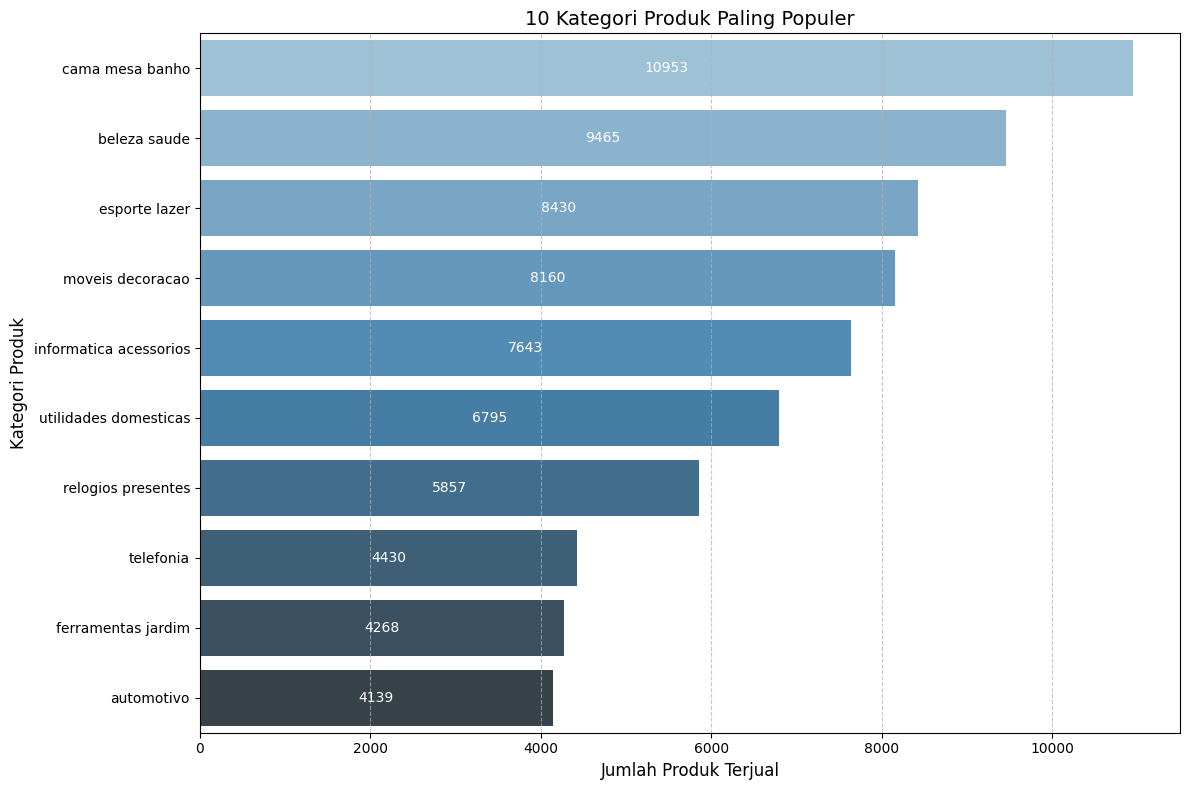

In [140]:

# Membatasi jumlah kategori yang ditampilkan untuk visualisasi yang lebih jelas
top_categories = category_sales.head(10)  # Menampilkan 10 kategori teratas

# Mengubah label kategori dengan mengganti underscore dengan spasi
top_categories.index = top_categories.index.str.replace('_', ' ')

# Mengurutkan kategori dari yang terpanjang ke yang terpendek
top_categories = top_categories.sort_values(ascending=False)

# Membuat grafik batang horizontal menggunakan Seaborn
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=top_categories.values, y=top_categories.index, palette='Blues_d')

# Menambahkan anotasi pada setiap batang di dalam batang
for index, value in enumerate(top_categories.values):
    bars.text(
        value / 2,  # Posisi horizontal dari teks (di tengah batang)
        index,  # Posisi vertikal dari teks (pada baris yang sesuai)
        f'{int(value)}',  # Menampilkan nilai batang
        va='center',  # Vertical alignment
        ha='center',  # Horizontal alignment
        fontsize=10,
        color='white'
    )

# Menambahkan garis grid untuk membantu visualisasi
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Memberi label pada sumbu x dan y
plt.xlabel('Jumlah Produk Terjual', fontsize=12)
plt.ylabel('Kategori Produk', fontsize=12)

# Memberi judul grafik
plt.title('10 Kategori Produk Paling Populer', fontsize=14)

# Menampilkan grafik
plt.tight_layout()  # Menyesuaikan layout otomatis
plt.show()


Kategori Produk paling banyak terjual adalah cama mesa banho disusul dengan beleza saude dan esporte lazer.

### 3.2 Di kota mana saja  jumlah pesanan tertinggi berada

In [107]:
# Menggabungkan tabel items dan sellers untuk mendapatkan informasi lokasi penjual
merged_items_sellers = pd.merge(data['items'], data['sellers'], on='seller_id')

# Menghitung jumlah penjualan per kota
city_sales = merged_items_sellers.groupby('seller_city')['order_id'].count().reset_index()

# Mengurutkan data berdasarkan jumlah pesanan (descending)
city_sales = city_sales.sort_values(by='order_id', ascending=False)

# Membatasi jumlah kota yang ditampilkan untuk analisis yang lebih jelas
top_cities = city_sales.head(10)

# Menampilkan hasil analisis
print("Kota dengan jumlah pesanan tertinggi:")
print(top_cities[['seller_city', 'order_id']])

Kota dengan jumlah pesanan tertinggi:
               seller_city  order_id
504              sao paulo     27354
222               ibitinga      7621
156               curitiba      2955
470            santo andre      2886
494  sao jose do rio preto      2544
62          belo horizonte      2522
437         rio de janeiro      2356
215              guarulhos      2308
430         ribeirao preto      2208
318                maringa      2194


C:\Users\USER\AppData\Local\Temp\ipykernel_18132\18144980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


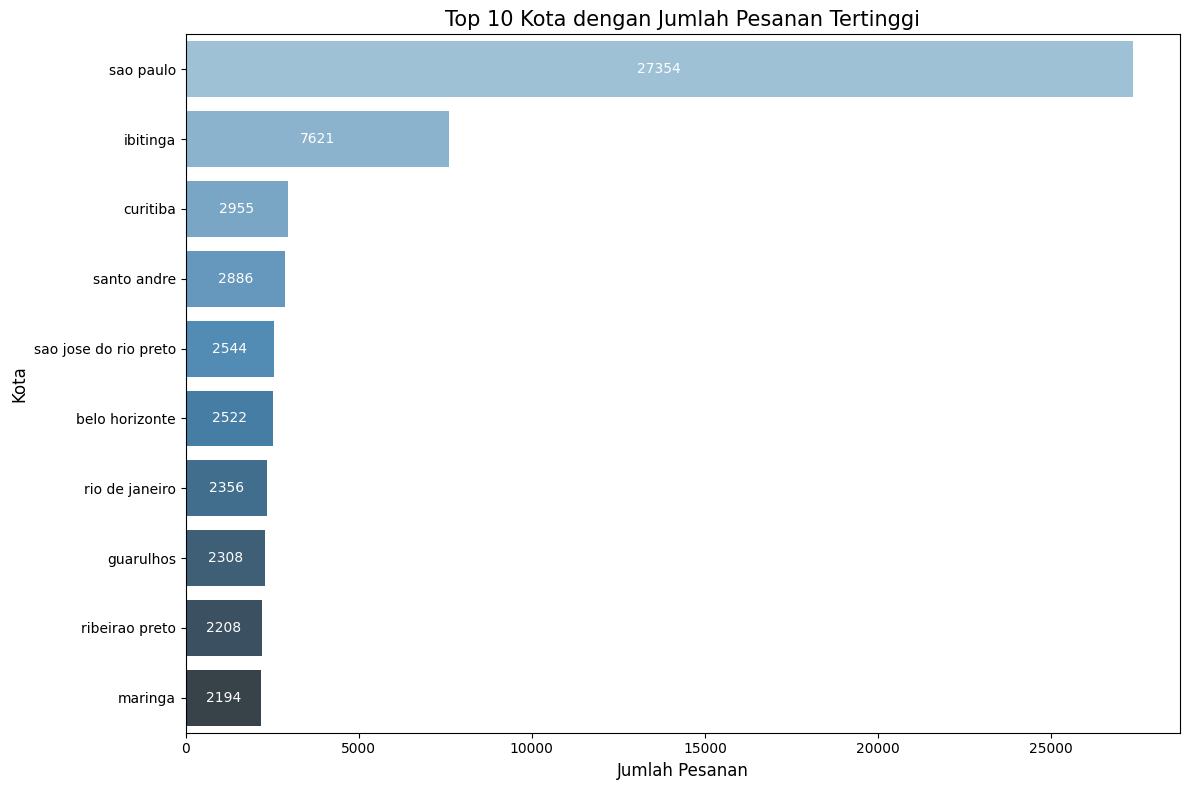

In [138]:

# Membuat grafik batang horizontal menggunakan Seaborn
plt.figure(figsize=(12, 8))
bars = sns.barplot(
    x='order_id', 
    y='seller_city', 
    data=top_cities, 
    palette='Blues_d'  # Mengganti palet warna
)

# Menambahkan label nilai di dalam batang
for index, value in enumerate(top_cities['order_id']):
    bars.text(
        value / 2,  # Posisi horizontal dari teks (di tengah batang)
        index,  # Posisi vertikal dari teks (pada baris yang sesuai)
        str(value),  # Menampilkan nilai batang
        va='center',  # Vertical alignment
        ha='center',  # Horizontal alignment
        fontsize=10,
        color='white'  # Warna teks
    )

# Menambahkan label dan judul
plt.xlabel('Jumlah Pesanan', fontsize=12)
plt.ylabel('Kota', fontsize=12)
plt.title('Top 10 Kota dengan Jumlah Pesanan Tertinggi', fontsize=15)

# Menampilkan grafik
plt.tight_layout()  # Menyesuaikan layout otomatis
plt.show()


sao paulo berada di urutan teratas dalam penjualan berdasarkan kota

### 3.3 Dimana lokasi yang memiliki pelanggan terbanyak?

In [127]:
# Menggabungkan tabel orders dan customers untuk mendapatkan informasi kota pelanggan
orders_customers = pd.merge(data['orders'], data['customers'], on='customer_id')
# Menggabungkan dengan tabel items untuk mendapatkan ID penjual
orders_customers_items = pd.merge(orders_customers, data['items'], on='order_id')
# Menggabungkan dengan tabel sellers untuk mendapatkan informasi kota penjual
orders_customers_sellers = pd.merge(orders_customers_items, data['sellers'], on='seller_id', how='inner')

# Menghitung jumlah pelanggan unik per kota penjual
city_customers = orders_customers_sellers.groupby('seller_city')['customer_id'].nunique().reset_index()

# Mengurutkan data berdasarkan jumlah pelanggan (descending)
city_customers = city_customers.sort_values(by='customer_id', ascending=False)

# Membatasi jumlah kota yang ditampilkan untuk analisis yang lebih jelas
top_cities_customers = city_customers.head(10)

# Menampilkan hasil analisis
print("Kota dengan jumlah pelanggan terbanyak:")
print(top_cities_customers[['seller_city', 'customer_id']])


Kota dengan jumlah pelanggan terbanyak:
               seller_city  customer_id
504              sao paulo        24036
222               ibitinga         6450
156               curitiba         2671
470            santo andre         2634
62          belo horizonte         2347
437         rio de janeiro         2112
215              guarulhos         2027
430         ribeirao preto         1965
494  sao jose do rio preto         1942
318                maringa         1836


C:\Users\USER\AppData\Local\Temp\ipykernel_18132\3913589991.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


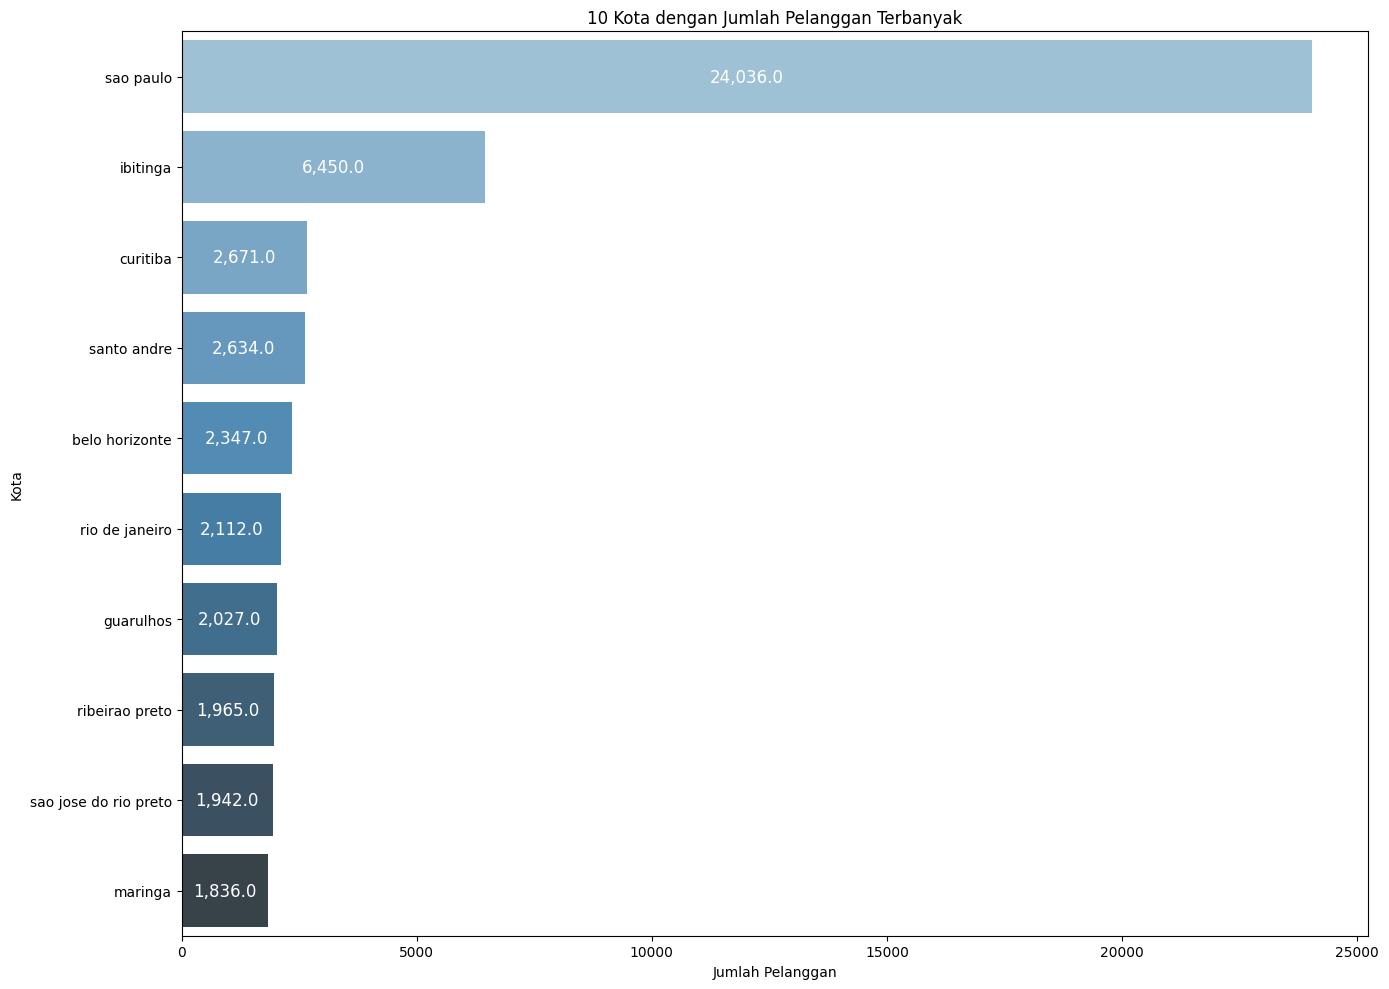

In [139]:

# Membuat grafik batang horizontal dengan detail lebih
plt.figure(figsize=(14, 10))

# Menggunakan seaborn untuk membuat barplot
ax = sns.barplot(
    x='customer_id',
    y='seller_city',
    data=top_cities_customers,
    palette='Blues_d'
)

# Menambahkan anotasi pada setiap bar dengan padding
for p in ax.patches:
    width = p.get_width()
    # Menempatkan teks di dalam bar jika bar cukup lebar, jika tidak, di luar
    x_text = width / 2 if width > 1000 else width + 50
    ax.text(
        x_text,  # Posisi horizontal untuk teks
        p.get_y() + p.get_height() / 2,  # Posisi vertikal untuk teks
        f'{width:,}',  # Format teks dengan pemisah ribuan
        ha='center' if width > 1000 else 'left',  # Horizontal alignment
        va='center',  # Vertical alignment
        fontsize=12,  # Ukuran font
        color='white' if width > 1000 else 'black'  # Warna font
    )

plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Kota')
plt.title('10 Kota dengan Jumlah Pelanggan Terbanyak')
plt.tight_layout()  # Mengatur layout agar tidak ada yang terpotong
plt.show()


Sao Paulo adalah kota dengan pelanggan terbanyak saat ini.

## **Conclusion**



Berdasarkan analisis data yang telah dilakukan, berikut adalah kesimpulan dari tiga pertanyaan yang diajukan:

1. **Kategori Produk Mana yang Paling Banyak Terjual?**
   - Kategori produk yang paling banyak terjual adalah **"cama mesa banho"** diikuti oleh **"beleza saude"** dan **"esporte lazer"**. Kategori-kategori ini mendominasi penjualan, menunjukkan bahwa produk dalam kategori ini lebih populer dan lebih sering dibeli dibandingkan dengan kategori lainnya. Ini bisa mengindikasikan bahwa produk-produk tersebut memenuhi kebutuhan konsumen secara luas atau memiliki daya tarik yang kuat di pasar.

2. **Di Kota Mana Saja Jumlah Pesanan Tertinggi Berada?**
   - Kota dengan jumlah pesanan tertinggi adalah **São Paulo**, diikuti oleh **Ibitinga**, **Curitiba**, dan **Santo André**. São Paulo adalah kota dengan jumlah pesanan terbanyak, yang mungkin mencerminkan ukuran pasar yang besar dan konsentrasi populasi yang tinggi. Kota-kota lainnya juga menunjukkan tingkat aktivitas perdagangan yang signifikan, namun tidak sebesar São Paulo. Ini menunjukkan bahwa São Paulo merupakan pusat utama untuk penjualan produk dalam dataset ini.

3. **Dimana Lokasi Pelanggan Terbanyak Berada?**
   - Lokasi dengan pelanggan terbanyak adalah **São Paulo**, diikuti oleh **Ibitinga**, **Curitiba**, dan **Santo André**. Analisis menunjukkan bahwa pelanggan lebih banyak berada di kota-kota besar dan ibu kota negara bagian seperti São Paulo, yang merupakan pusat ekonomi dan komersial utama. Ini konsisten dengan data penjualan, di mana kota-kota besar sering kali menjadi pusat kegiatan perdagangan yang intensif.

Kesimpulan ini memberikan wawasan penting mengenai distribusi produk, konsentrasi penjualan, dan sebaran pelanggan, yang dapat digunakan untuk merancang strategi pemasaran dan distribusi yang lebih efektif.
